In [ ]:
%reload_ext autoreload
%autoreload 2

### Scores for bias Gen

./Final_Test_MetricsBase_CNN.npz
           precision    recall  f1-score
cloth       0.840376  0.895000  0.866828
no_face     0.882051  0.855721  0.868687
surgical    0.774510  0.793970  0.784119
n95         0.848485  0.840000  0.844221
incorrect   0.900000  0.855000  0.876923
Overall acc:  0.848


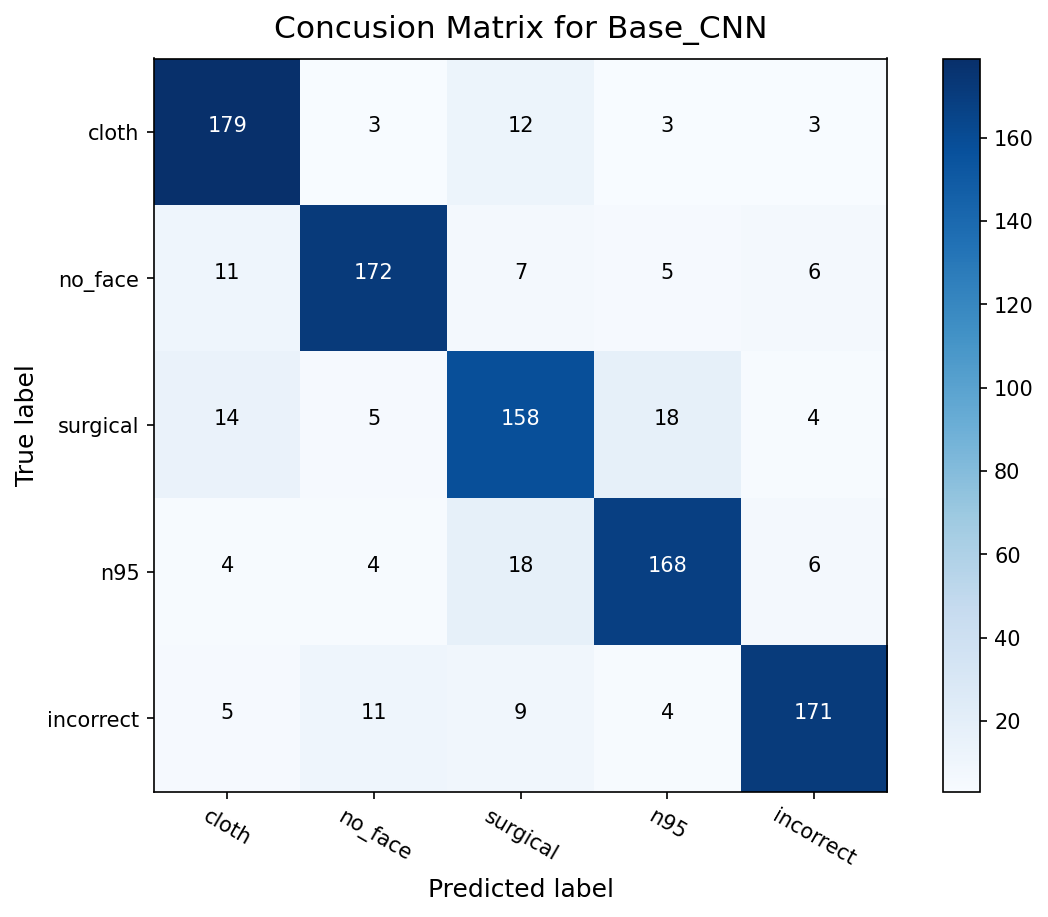

./Final_Test_MetricsBase_CNN.npz
              precision    recall  f1-score bias(fm - m)
cloth_m        0.795181  0.942857  0.862745             
cloth_fm       0.869231  0.869231  0.869231   0.00648567
no_face_m      0.919540  0.792079  0.851064             
no_face_fm     0.851852  0.920000  0.884615    0.0335516
surgical_m     0.785714  0.797101  0.791367             
surgical_fm    0.768657  0.792308  0.780303   -0.0110639
n95_m          0.818182  0.890110  0.852632             
n95_fm         0.878788  0.798165  0.836538   -0.0160931
incorrect_m    0.893333  0.807229  0.848101             
incorrect_fm   0.904348  0.888889  0.896552    0.0484505
Overall acc:  0.848


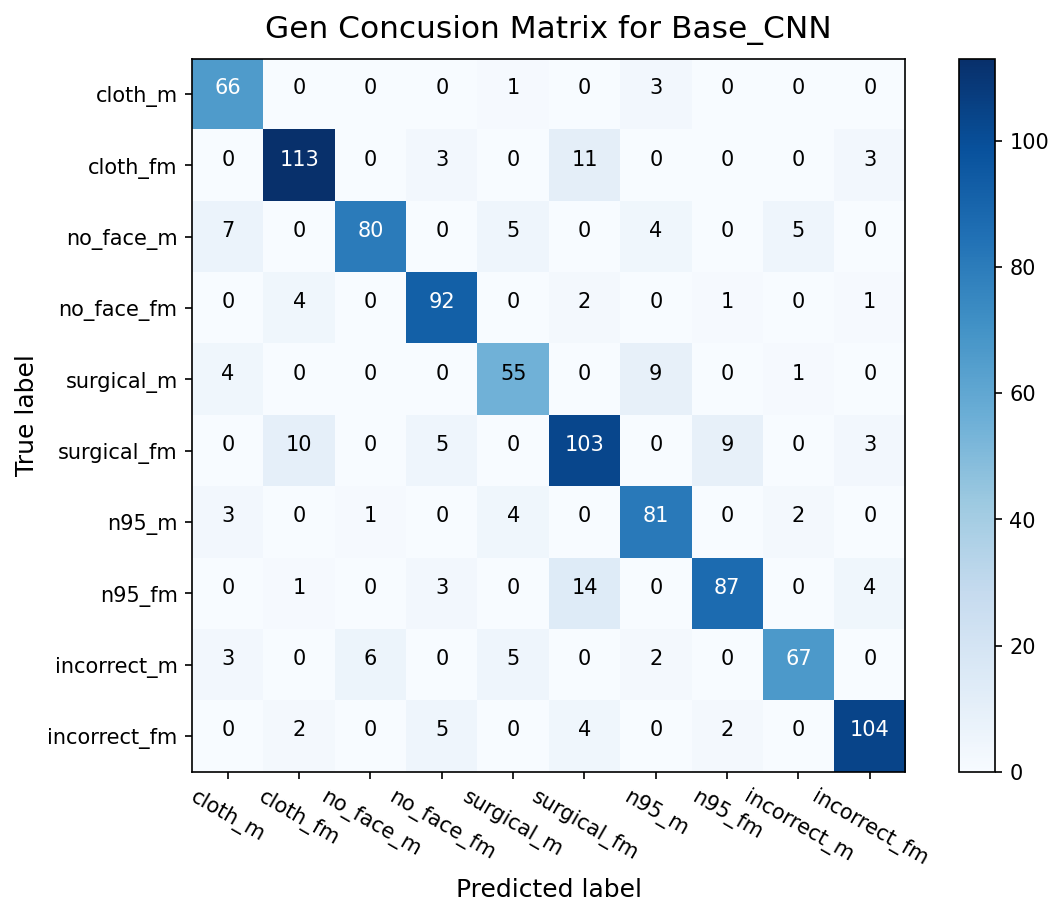

./Final_Test_MetricsBase_CNN.npz
                precision    recall  f1-score bias(afar - caas)
cloth_caas       0.827160  0.899329  0.861736                  
cloth_afar       0.882353  0.882353  0.882353         0.0206166
no_face_caas     0.850000  0.836066  0.842975                  
no_face_afar     0.933333  0.886076  0.909091         0.0661157
surgical_caas    0.789474  0.779221  0.784314                  
surgical_afar    0.730769  0.844444  0.783505      -0.000808571
n95_caas         0.833333  0.833333  0.833333                  
n95_afar         0.904762  0.863636  0.883721         0.0503876
incorrect_caas   0.901316  0.850932  0.875399                  
incorrect_afar   0.894737  0.871795  0.883117        0.00771752
Overall acc:  0.848


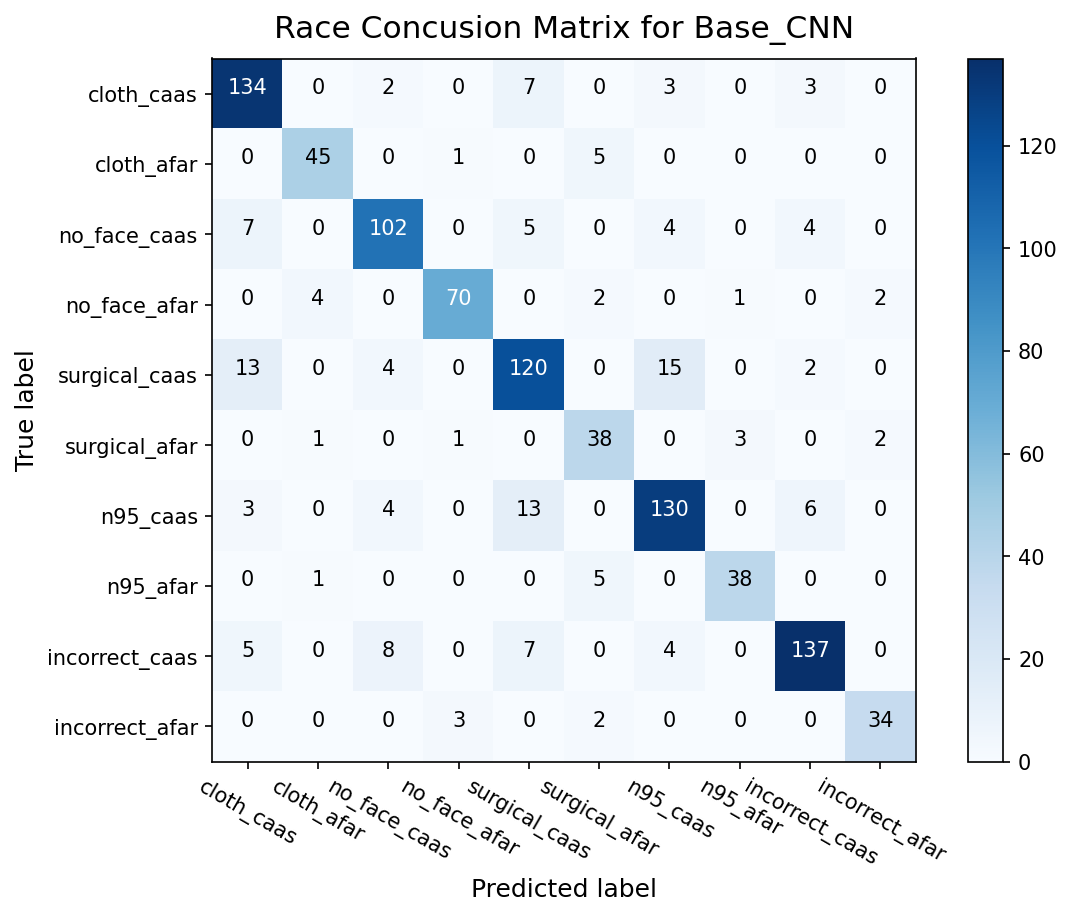

In [1]:
import evaluation

metrics_file_path = './Final_Test_MetricsBase_CNN.npz'

evaluation.read_socres(metrics_file_path, conf_m_title='Concusion Matrix for Base_CNN')
evaluation.read_socres_gen(metrics_file_path, conf_m_title='Gen Concusion Matrix for Base_CNN')
evaluation.read_socres_race(metrics_file_path, conf_m_title='Race Concusion Matrix for Base_CNN')

In [ ]:
import torch
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as T
import matplotlib.pyplot as plt

from data_process.DatasetHelper import label_map
from data_process.DatasetHelper import label_map_new
from data_process.DatasetHelper import ImageDataset

data = ImageDataset('./data/aug_2')
data_loader = torch.utils.data.DataLoader(data, batch_size=100000, shuffle=True, num_workers=1)

for data, labels in data_loader:
    data_X, data_y = data.float(), labels
    
data_y = data_y.numpy()

In [ ]:
from evaluation import downgrade_argmax_target_to_gen, gen_label_list

gen_arr = []
# for